<a href="https://colab.research.google.com/github/sofiahanim/diabetespredictionregressionclassification/blob/main/Diabetes_Prediction_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [ ]:
# Start resource monitoring in background
monitor_resources <- function() {
  cat("Monitoring resources...\n")
  while (!exists("stop_monitoring") || !stop_monitoring) {
    # Monitoring CPU and Memory usage
    mem_usage <- memory.size()
    cat("Memory Usage:", mem_usage, "MB\n")
    
    cpu_usage <- system("wmic cpu get loadpercentage", intern = TRUE)
    cat("CPU Usage:", cpu_usage[2], "%\n")
    
    Sys.sleep(5)  # Adjust the interval as needed
  }
}

# Start monitoring
monitor_resources()


In [2]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
install.packages("corrplot")
library(corrplot)

# Load the dataset
data <- read.csv("diabetes.csv")

# Glimpse of the data
glimpse(data)

Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Installing package into 'C:/Users/hanim/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hanim\AppData\Local\Temp\RtmpsbI9dO\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 4.4.2"
corrplot 0.95 loaded



Rows: 768
Columns: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, …
$ Glucose                  <int> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125…
$ BloodPressure            <int> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74…
$ SkinThickness            <int> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, …
$ Insulin                  <int> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, …
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.…
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2…
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3…
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, …


**Summary Statistics**

In [3]:
# Summary statistics for all variables
data %>%
  summarise(across(everything(), list(mean = mean, sd = sd, min = min, max = max), na.rm = TRUE))

Warning message:
"There was 1 warning in `summarise()`.
ℹ In argument: `across(...)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))"


Pregnancies_mean,Pregnancies_sd,Pregnancies_min,Pregnancies_max,Glucose_mean,Glucose_sd,Glucose_min,Glucose_max,BloodPressure_mean,BloodPressure_sd,⋯,DiabetesPedigreeFunction_min,DiabetesPedigreeFunction_max,Age_mean,Age_sd,Age_min,Age_max,Outcome_mean,Outcome_sd,Outcome_min,Outcome_max
<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
3.845052,3.369578,0,17,120.8945,31.97262,0,199,69.10547,19.35581,⋯,0.078,2.42,33.24089,11.76023,21,81,0.3489583,0.4769514,0,1


**Missing Value Analysis**

In [4]:
# Check for missing values
data %>%
  summarise(across(everything(), ~sum(is.na(.))))

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


**Distribution of Variables**

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


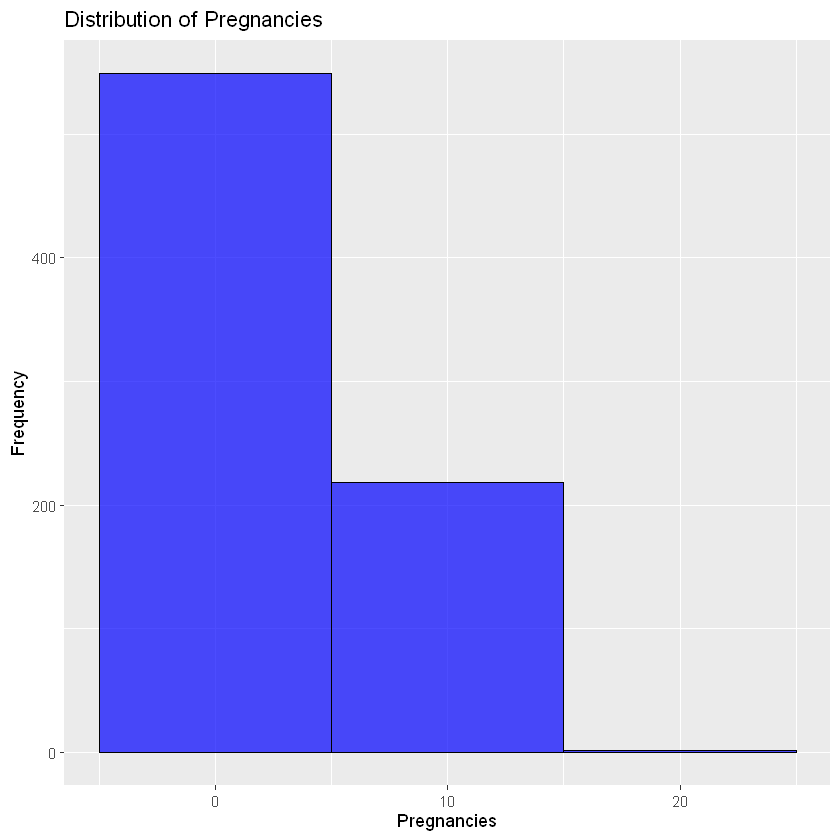

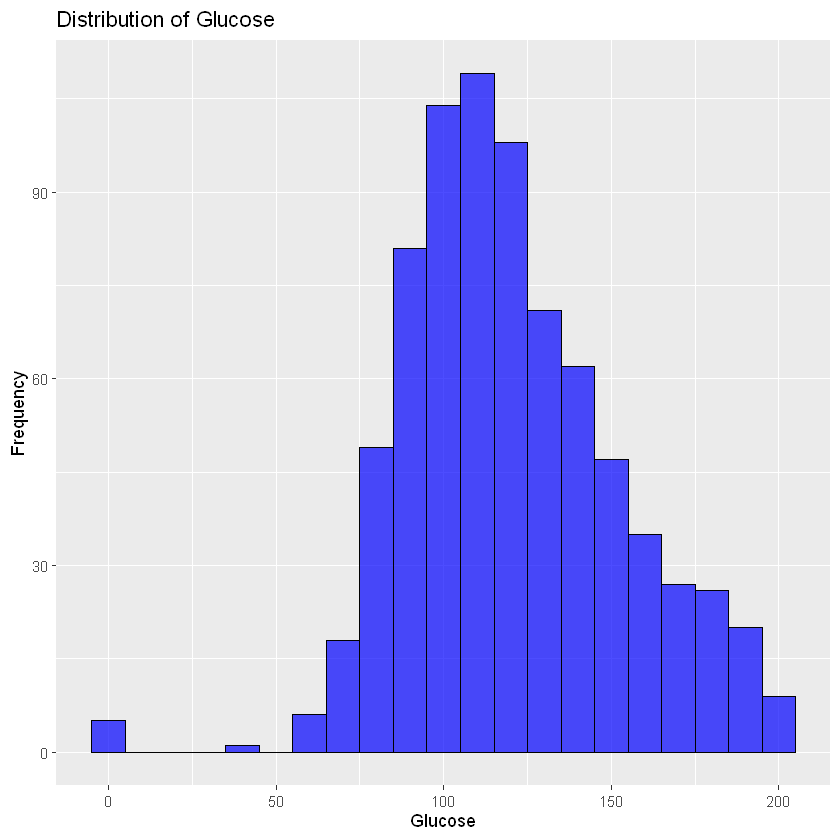

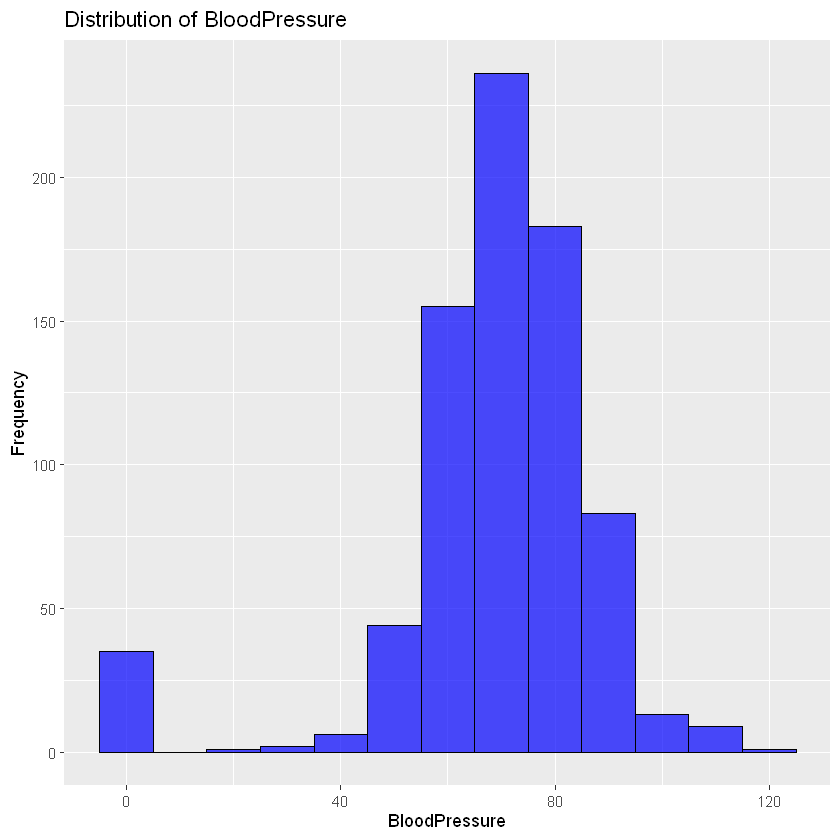

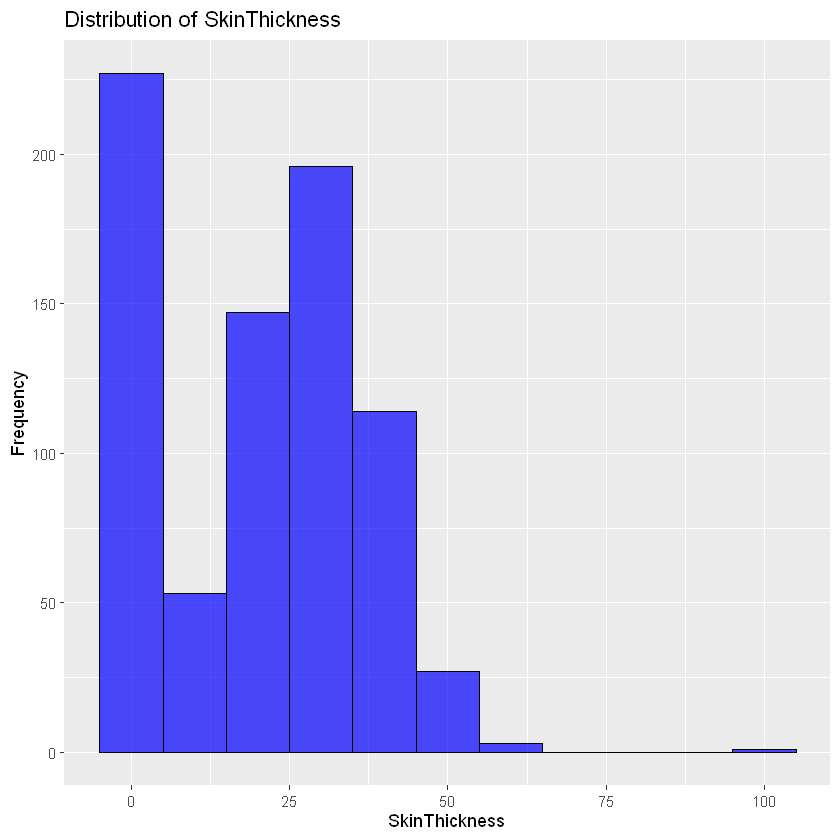

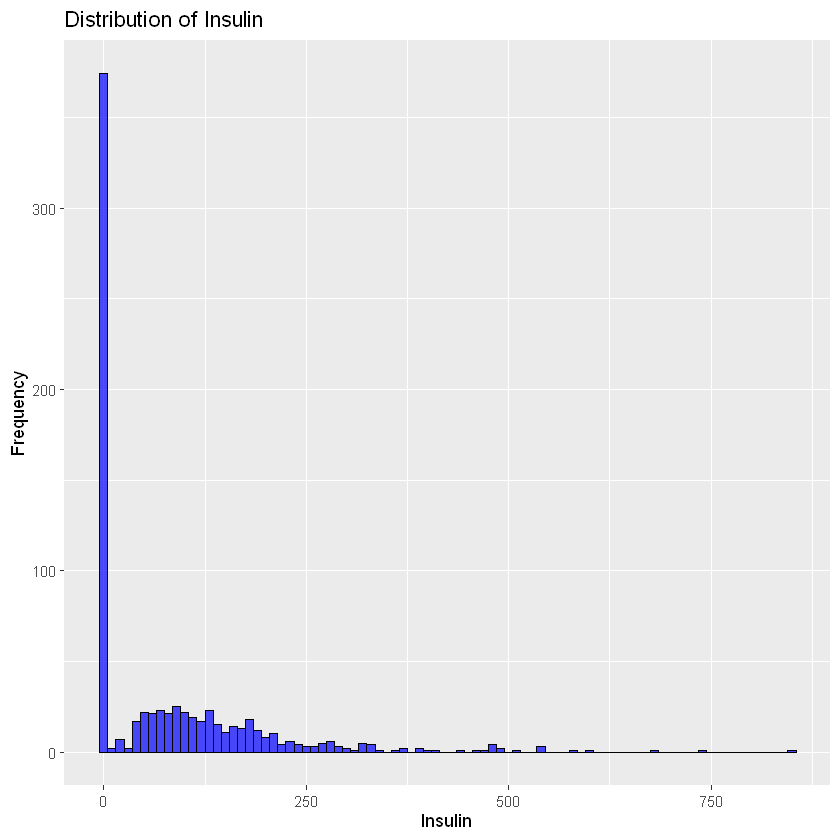

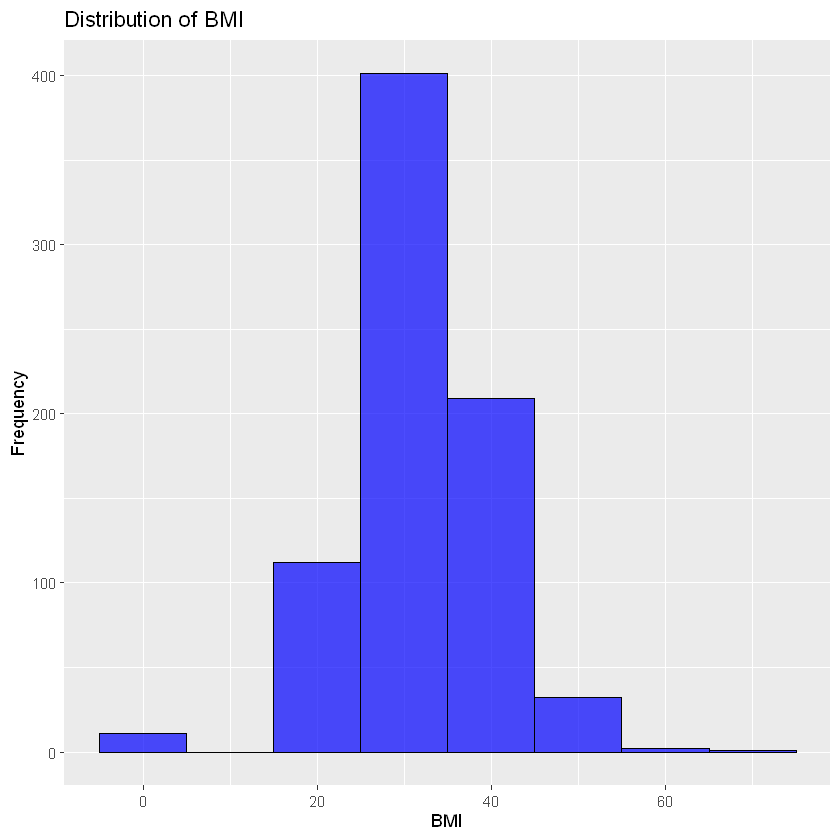

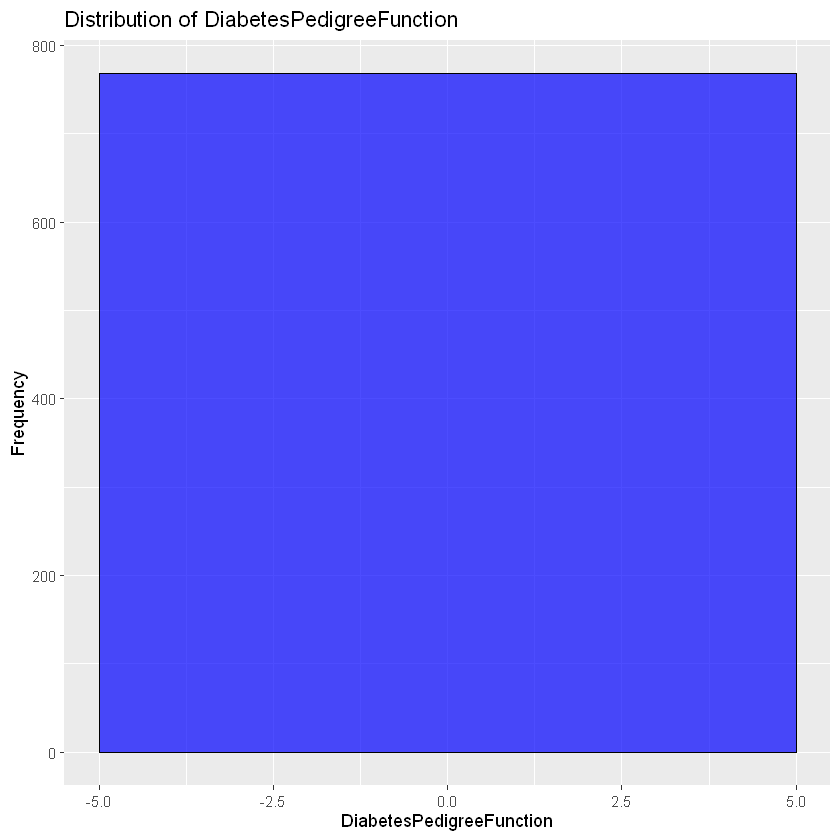

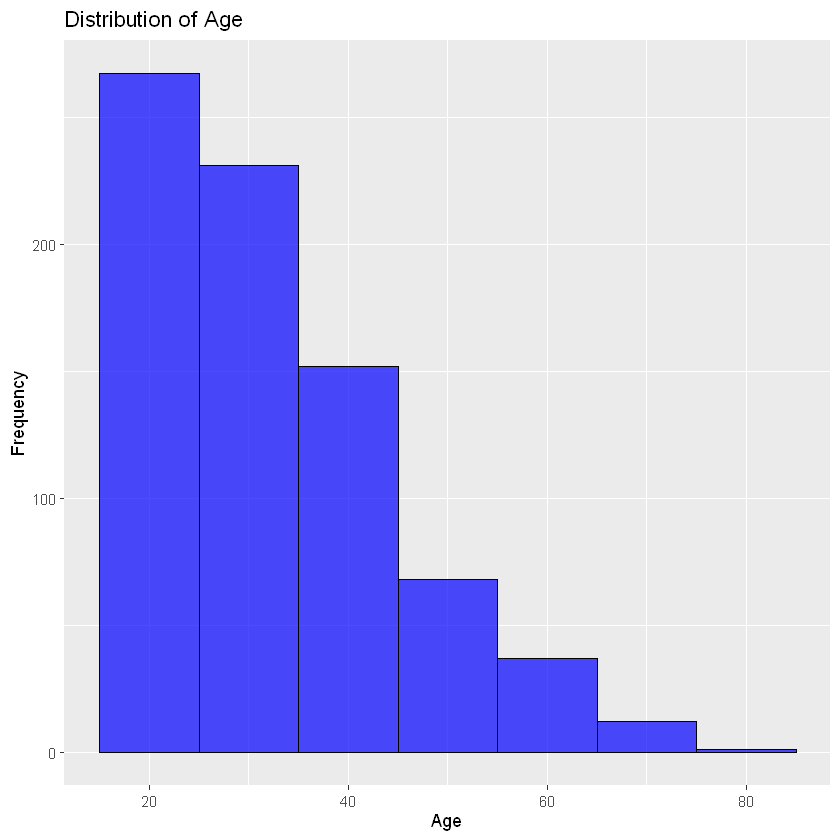

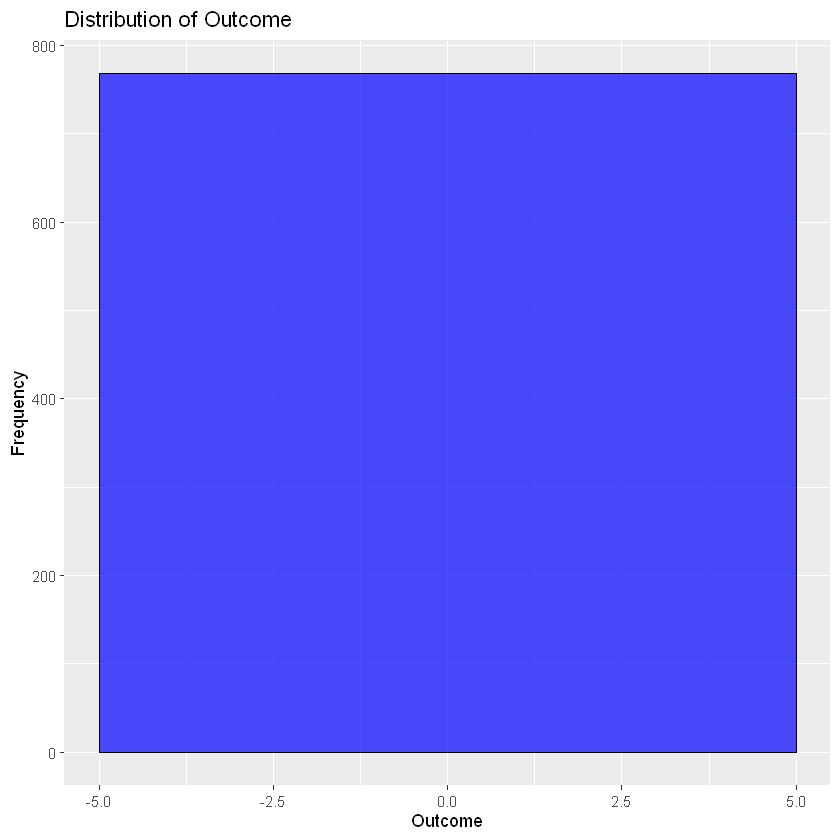

In [5]:
# Histogram for numerical variables
numeric_cols <- colnames(data)[sapply(data, is.numeric)]
for (col in numeric_cols) {
  print(
    ggplot(data, aes_string(x = col)) +
      geom_histogram(binwidth = 10, fill = "blue", color = "black", alpha = 0.7) +
      labs(title = paste("Distribution of", col), x = col, y = "Frequency")
  )
}

**Correlation Analysis**

                         Pregnancies    Glucose BloodPressure SkinThickness
Pregnancies               1.00000000 0.12945867    0.14128198   -0.08167177
Glucose                   0.12945867 1.00000000    0.15258959    0.05732789
BloodPressure             0.14128198 0.15258959    1.00000000    0.20737054
SkinThickness            -0.08167177 0.05732789    0.20737054    1.00000000
Insulin                  -0.07353461 0.33135711    0.08893338    0.43678257
BMI                       0.01768309 0.22107107    0.28180529    0.39257320
DiabetesPedigreeFunction -0.03352267 0.13733730    0.04126495    0.18392757
Age                       0.54434123 0.26351432    0.23952795   -0.11397026
Outcome                   0.22189815 0.46658140    0.06506836    0.07475223
                             Insulin        BMI DiabetesPedigreeFunction
Pregnancies              -0.07353461 0.01768309              -0.03352267
Glucose                   0.33135711 0.22107107               0.13733730
BloodPressure        

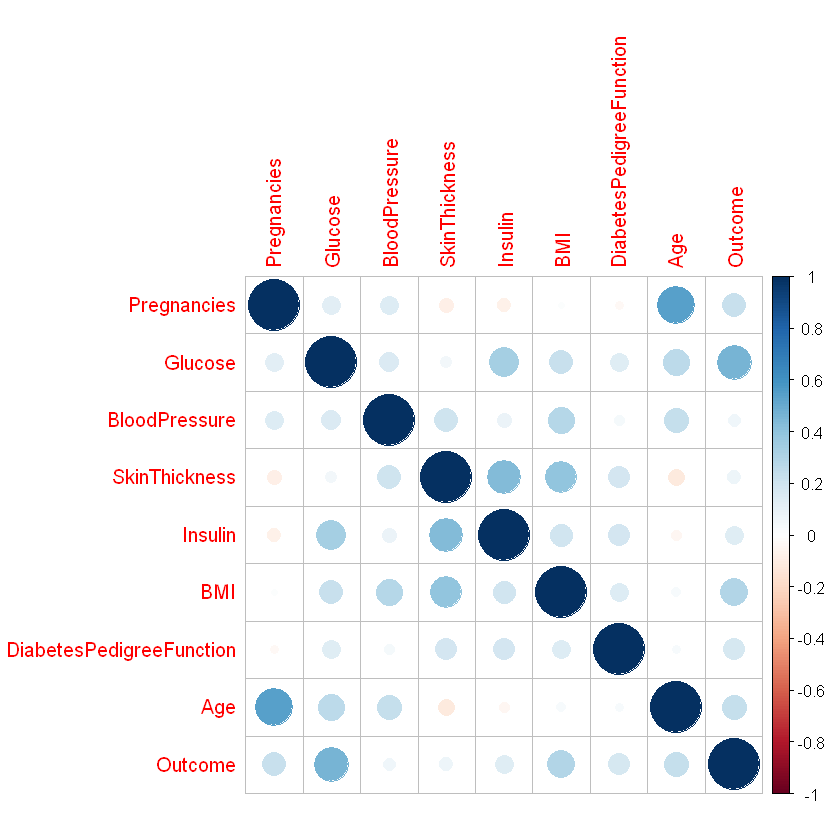

In [6]:
# Correlation matrix
cor_matrix <- cor(data %>% select_if(is.numeric), use = "complete.obs")
print(cor_matrix)

# Visualize correlations
library(corrplot)
corrplot::corrplot(cor_matrix, method = "circle")

**Outcome Analysis**

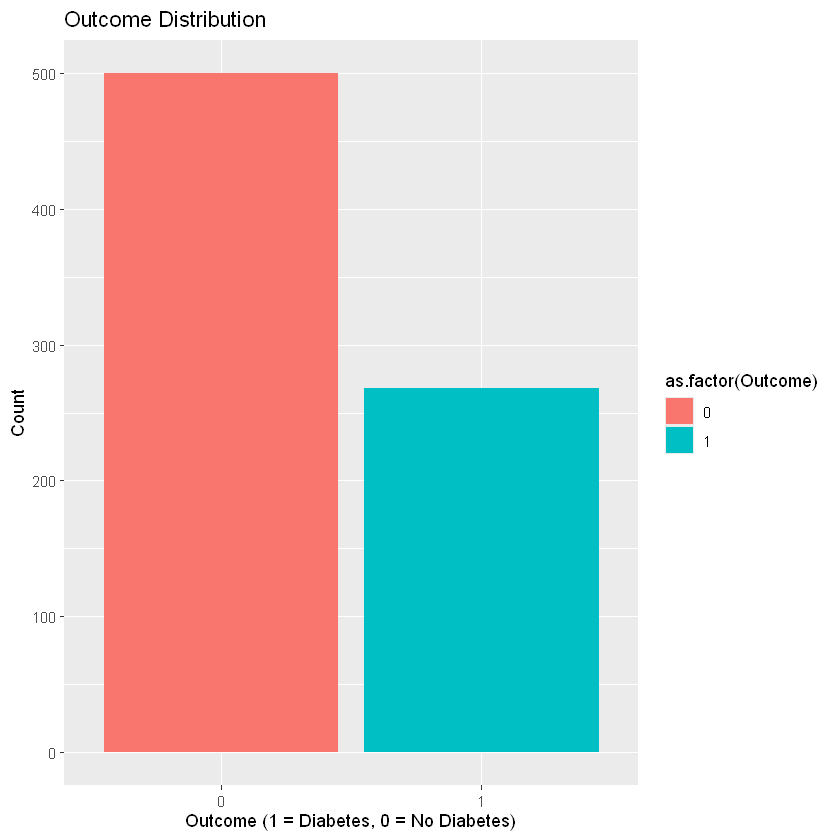

In [7]:
# Distribution of Outcome variable
data %>%
  group_by(Outcome) %>%
  summarise(Count = n()) %>%
  ggplot(aes(x = as.factor(Outcome), y = Count, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity") +
  labs(title = "Outcome Distribution", x = "Outcome (1 = Diabetes, 0 = No Diabetes)", y = "Count")

**Relationships Between Variables**

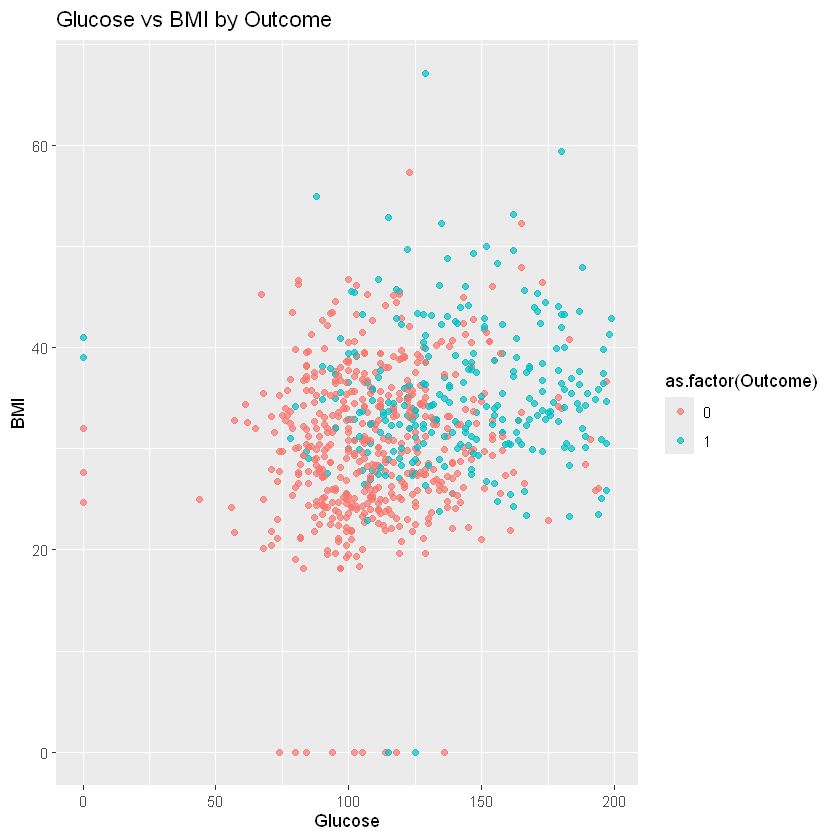

In [8]:
# Scatter plot between Glucose and BMI grouped by Outcome
ggplot(data, aes(x = Glucose, y = BMI, color = as.factor(Outcome))) +
  geom_point(alpha = 0.7) +
  labs(title = "Glucose vs BMI by Outcome", x = "Glucose", y = "BMI")

**Age Group Analysis**

`summarise()` has grouped output by 'AgeGroup'. You can override using the
`.groups` argument.


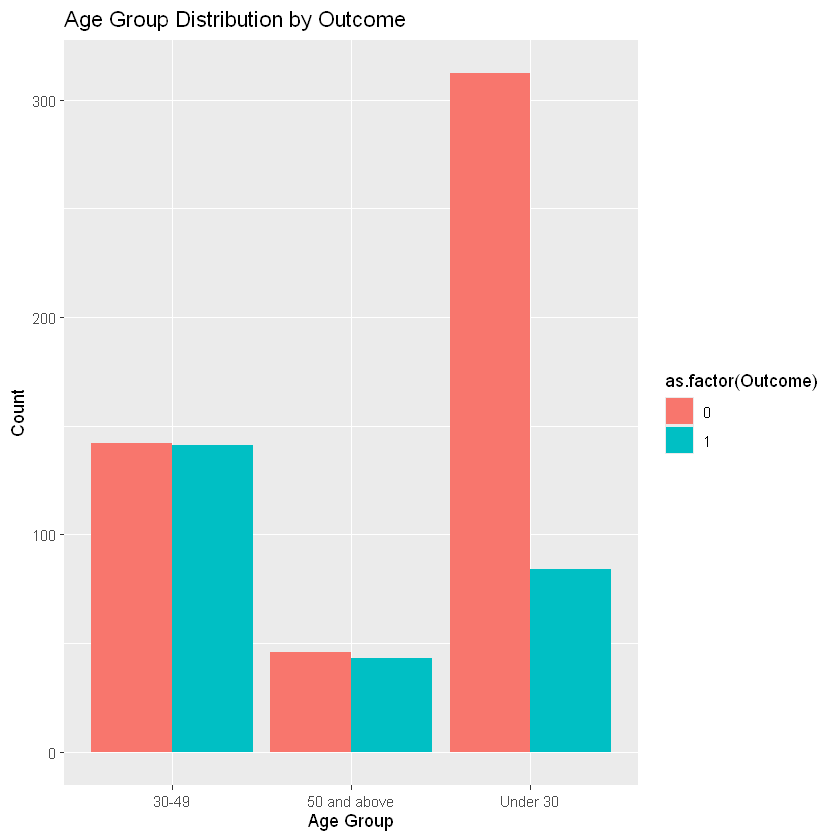

In [9]:
# Categorize Age into groups
data <- data %>%
  mutate(AgeGroup = case_when(
    Age < 30 ~ "Under 30",
    Age >= 30 & Age < 50 ~ "30-49",
    Age >= 50 ~ "50 and above"
  ))

# Age group distribution by Outcome
data %>%
  group_by(AgeGroup, Outcome) %>%
  summarise(Count = n()) %>%
  ggplot(aes(x = AgeGroup, y = Count, fill = as.factor(Outcome))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Age Group Distribution by Outcome", x = "Age Group", y = "Count")

# Modelling

## Classification Modelling

Split test train

In [29]:
install.packages("caret")
library(caret)

set.seed(123)
trainIndex <- createDataPartition(data$Outcome, p = 0.8, list = FALSE)

# Create training and testing sets
train <- data[trainIndex, ]
test <- data[-trainIndex, ]

# Convert Outcome to factor
train$Outcome <- as.factor(train$Outcome)
test$Outcome <- as.factor(test$Outcome)

Warning message:
"package 'caret' is in use and will not be installed"


### Logistic Regression

In [30]:
logistic_model <- glm(Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + BloodPressure, data = train, family = binomial)

# Model summary
summary(logistic_model)

# Predict probabilities and classes
predicted_probs <- predict(logistic_model, newdata = test, type = "response")
predicted_classes <- ifelse(predicted_probs > 0.5, 1, 0)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + 
    BloodPressure, family = binomial, data = train)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -7.781487   0.730083 -10.658  < 2e-16 ***
Pregnancies               0.148092   0.031149   4.754 1.99e-06 ***
Glucose                   0.034966   0.003868   9.041  < 2e-16 ***
BMI                       0.081138   0.015726   5.159 2.48e-07 ***
DiabetesPedigreeFunction  0.766364   0.316109   2.424   0.0153 *  
BloodPressure            -0.011987   0.005542  -2.163   0.0305 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 797.28  on 614  degrees of freedom
Residual deviance: 587.34  on 609  degrees of freedom
AIC: 599.34

Number of Fisher Scoring iterations: 5


### Support Vector Machine (SVM)

In [31]:
library(e1071)

svm_model <- svm(Outcome ~  Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + BloodPressure, data=train, kernel='radial', probability= TRUE)

#Model summary
summary(svm_model)

svm_predictions <- predict(svm_model, newdata = test, probability = TRUE)


Call:
svm(formula = Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + 
    BloodPressure, data = train, kernel = "radial", probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  347

 ( 177 170 )


Number of Classes:  2 

Levels: 
 0 1




### Naive Bayes

In [32]:
nb_model <- naiveBayes(Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction + BloodPressure, data = train)

#Model summary
summary(nb_model)

nb_predictions <- predict(nb_model, newdata = test)

          Length Class  Mode     
apriori   2      table  numeric  
tables    5      -none- list     
levels    2      -none- character
isnumeric 5      -none- logical  
call      4      -none- call     

### XGBoost

In [33]:
# Ensure all columns except 'Outcome' are numeric
train_numeric <- train[, -9]  # Exclude the Outcome column
train_numeric[] <- lapply(train_numeric, as.numeric)  # Convert all columns to numeric

# Check if conversion worked
str(train_numeric)

# Create the DMatrix object
train_matrix <- xgb.DMatrix(data = as.matrix(train_numeric), label = train$Outcome)


'data.frame':	615 obs. of  8 variables:
 $ Pregnancies             : num  1 1 0 5 3 10 8 4 10 10 ...
 $ Glucose                 : num  85 89 137 116 78 115 125 110 168 139 ...
 $ BloodPressure           : num  66 66 40 74 50 0 96 92 74 80 ...
 $ SkinThickness           : num  29 23 35 0 32 0 0 0 0 0 ...
 $ Insulin                 : num  0 94 168 0 88 0 0 0 0 0 ...
 $ BMI                     : num  26.6 28.1 43.1 25.6 31 35.3 0 37.6 38 27.1 ...
 $ DiabetesPedigreeFunction: num  0.351 0.167 2.288 0.201 0.248 ...
 $ Age                     : num  31 21 33 30 26 29 54 30 34 57 ...


In [34]:
# Load necessary libraries
install.packages("xgboost")
install.packages("corrplot")
library(xgboost)
library(corrplot)

# Load the dataset
data <- read.csv("diabetes.csv")

# Glimpse of the data
str(data)

# Convert all columns except 'Outcome' to numeric
data_numeric <- data[, -9]  # Exclude the Outcome column
data_numeric[] <- lapply(data_numeric, function(x) {
  if (is.factor(x)) {
    return(as.numeric(as.character(x)))  # Convert factors to numeric
  } else if (is.character(x)) {
    return(as.numeric(x))  # If it's a character, try converting to numeric
  } else {
    return(x)  # If it's already numeric, leave it unchanged
  }
})

# Check if conversion worked and if there are any NA values
str(data_numeric)
sum(is.na(data_numeric))

# Handle missing values (Optional: You can remove NAs or impute them)
data_numeric[is.na(data_numeric)] <- sapply(data_numeric, function(x) mean(x, na.rm = TRUE))

# Convert 'Outcome' to numeric for xgboost
data$Outcome <- as.numeric(as.character(data$Outcome))

# Create xgboost matrix
xgb_data <- xgb.DMatrix(data = as.matrix(data_numeric), label = data$Outcome)

# Split data into training and testing sets (80-20 split)
set.seed(123)  # Set a seed for reproducibility
train_index <- sample(1:nrow(data), 0.8 * nrow(data))  # 80% for training
train <- data[train_index, ]
test <- data[-train_index, ]

# Create training and test xgboost matrices
xgb_train <- xgb.DMatrix(data = as.matrix(train[, -9]), label = train$Outcome)
xgb_test <- xgb.DMatrix(data = as.matrix(test[, -9]), label = test$Outcome)

# Set parameters for xgboost model
params <- list(
  booster = "gbtree",
  objective = "binary:logistic",
  eval_metric = "logloss",
  eta = 0.1,
  max_depth = 6,
  nthread = 2
)

# Train xgboost model
xgb_model <- xgb.train(
  params = params,
  data = xgb_train,
  nrounds = 100,
  watchlist = list(train = xgb_train, test = xgb_test),
  print_every_n = 10,
  early_stopping_rounds = 10
)

# Predict on test data
xgb_predictions <- predict(xgb_model, xgb_test)

# Convert predictions to classes (0 or 1)
xgb_predicted_classes <- ifelse(xgb_predictions > 0.5, 1, 0)

# Evaluate model performance (Optional: Accuracy or AUC, etc.)
conf_matrix <- table(Predicted = xgb_predicted_classes, Actual = test$Outcome)
print(conf_matrix)
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy: ", accuracy))


Warning message:
"package 'xgboost' is in use and will not be installed"
Warning message:
"package 'corrplot' is in use and will not be installed"


'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...
'data.frame':	768 obs. of  8 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 

[1] 0

[1]	train-logloss:0.646806	test-logloss:0.661225 
Multiple eval metrics are present. Will use test_logloss for early stopping.
Will train until test_logloss hasn't improved in 10 rounds.

[11]	train-logloss:0.385339	test-logloss:0.530634 
[21]	train-logloss:0.290012	test-logloss:0.501206 
[31]	train-logloss:0.238492	test-logloss:0.488475 
[41]	train-logloss:0.202414	test-logloss:0.479103 
[51]	train-logloss:0.178139	test-logloss:0.481212 
Stopping. Best iteration:
[47]	train-logloss:0.186442	test-logloss:0.476764

         Actual
Predicted  0  1
        0 89 26
        1 13 26
[1] "Accuracy:  0.746753246753247"


## Regression Modelling

To carry out regression modelling, using the same dataset, 'BMI' is chosen to be the target variable.

The regression models chosen to explore with are Linear Regression, Random Forest and XGBoost

Train-test split

In [35]:
# Select the features and target variable
# We will predict BMI using other features
dataReg <- subset(data, select = -c(Outcome)) # Exclude the binary outcome column

# Split the data into training and testing sets
set.seed(123)  # For reproducibility
trainIndex <- createDataPartition(dataReg$BMI, p = 0.8, list = FALSE)
trainData <- dataReg[trainIndex, ]
testData <- dataReg[-trainIndex, ]



In [36]:
# Install package
install.packages("randomForest")
# Load the package
library(randomForest)

Warning message:
"package 'randomForest' is in use and will not be installed"


### Linear Regression

In [37]:
# Train a linear regression model
lm_model <- train(BMI ~ ., data = trainData, method = "lm")

# View the model summaries
cat("Linear Regression Summary:\n")
summary(lm_model$finalModel)


# Make predictions on the test set
lm_pred <- predict(lm_model, newdata = testData)

Linear Regression Summary:



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.852  -3.960  -0.195   3.697  28.249 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              16.994090   1.521067  11.172  < 2e-16 ***
Pregnancies               0.043360   0.101077   0.429   0.6681    
Glucose                   0.051422   0.009903   5.193 2.83e-07 ***
BloodPressure             0.085203   0.015587   5.466 6.72e-08 ***
SkinThickness             0.165516   0.021356   7.751 3.85e-14 ***
Insulin                  -0.003679   0.002906  -1.266   0.2060    
DiabetesPedigreeFunction  1.434437   0.861407   1.665   0.0964 .  
Age                      -0.029789   0.030587  -0.974   0.3305    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.956 on 609 degrees of freedom
Multiple R-squared:  0.227,	Adjusted R-squared:  0.2181 
F-statistic: 25.55 on 7 and 609 DF,  p-value: < 2.2e-16


### Random Forest

In [38]:
# Train a random forest regression model
rf_model <- train(BMI ~ ., data = trainData, method = "rf",
                  tuneGrid = expand.grid(.mtry = seq(2, ncol(trainData) - 1, by = 1)),
                  trControl = trainControl(method = "cv", number = 5))



cat("\nRandom Forest Model Parameters:\n")
print(rf_model$bestTune)

rf_pred <- predict(rf_model, newdata = testData)



Random Forest Model Parameters:
  mtry
1    2


### XGBoost

In [39]:
# Train an XGBoost regression model
xgb_model <- train(BMI ~ ., data = trainData, method = "xgbLinear",
                   tuneGrid = expand.grid(.nrounds = seq(50, 200, by = 50),
                                          .lambda = c(0, 0.1, 1),
                                          .alpha = c(0, 0.1, 1),
                                          .eta = c(0.01, 0.1, 0.3)),
                   trControl = trainControl(method = "cv", number = 5))

cat("\nXGBoost Model Best Parameters:\n")
print(xgb_model$bestTune)


xgb_pred <- predict(xgb_model, newdata = testData)


XGBoost Model Best Parameters:
   nrounds lambda alpha  eta
25      50      1     1 0.01


# Evaluation

In [40]:
# Last cell: Set flag to stop monitoring
stop_monitoring <- TRUE
cat("Resource monitoring has stopped.\n")

Resource monitoring has stopped.
